In [331]:
import numpy as np
from matplotlib import pyplot as plt

class RBF():
    def __init__(self,hidden_dim):
        self.hidden_dim = hidden_dim
        #self.centers = center_pos
        #self.weights = np.random.uniform(-1,1,self.hidden_dim)      #relevant only for online learning
        #self.centers = [np.random.uniform(0, 2*np.pi) for i in range(self.hidden_dim)]
        
        self.weights = np.linspace(0,1,hidden_dim) #relevant only for online learning
        self.centers = np.linspace(0,2*np.pi,hidden_dim)  # place the rbf centers evenly in the [0,2π]
        self.sigma = None
    
    def phi(self,x):
        return [np.exp(-((x-ci)**2)/(2*self.sigma**2)) for ci in self.centers]  # returns [phi_1(x),phi_2(x)....phi_n(x)]
    
    
    def setWeights(self,w):
        self.weights = w
    
    def setCenters(self,centers):
        self.centers = centers
    
    def setVariance(self,variance):
        self.sigma = variance
    
    def fit(self,X,y):                          #batch learning
        PHI = np.array([self.phi(xi) for xi in X])
        self.weights = np.linalg.inv(PHI.T@PHI)@PHI.T@y
    
    def online_learning(self,X,y,lr,epochs):
        #shuffle the data
        seed = 42
        np.random.seed(seed)
        idx = list(range(X.shape[0]))
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]
        for epoch in range(epochs):
            for x,y in zip(np.nditer(X),np.nditer(y)):
                PHI_x = np.array(self.phi(x))
                e = y - PHI_x.T@self.weights
                dw = lr*e*PHI_x
                self.weights = self.weights + dw

    def predict(self,X):
        PHI = np.array([self.phi(xi) for xi in X])
        y_pred = PHI@self.weights
        return y_pred


def residual_error(y_pred,y):
    return np.mean(np.abs(y_pred-y))

def plot_data(x_test,y_test,y_pred,hidden_n,function):
    # plot original data
    
    plt.figure(figsize=(5, 5))
    plt.plot(x_test, y_test, 'r-',label = "ground truth")

    # plot model predictions
    plt.plot(x_test, y_pred, 'b-',label = "predicted values")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.title("{} predictions for {} rbf centers".format(function,hidden_n))
    plt.savefig("{}_{}.png".format(function,hidden_n))
    plt.show()

def square(x):
    return np.where(np.sin(x) >= 0, 1, -1)

def sigmoid(x):
    return 1/(1+np.exp(-x))

In [332]:
#train data
x_train = np.arange(0,2*np.pi,0.1)
y_train_sine = np.array(np.sin(2*x_train))
y_train_square = square(2*x_train)

#test_data
x_test = np.arange(0.05,2*np.pi,0.1)
y_test_sine = np.sin(2*x_test)
y_test_square = square(2*x_test)

# Batch Learning
# f(x) = sin(2x)

In [333]:
hidden_units = 30
rbf = RBF(hidden_units)
rbf.setVariance(0.1)

In [334]:
rbf.fit(x_train,y_train_sine)

In [335]:
y_pred_sine = rbf.predict(x_test)
test_error = residual_error(y_pred,y_test_sine)
y_train_pred = rbf.predict(x_train)
train_error = residual_error(y_train_pred,y_train_sine)
print("residual train error for hidden units = {} is {}".format(hidden_units,train_error))
print("residual test error for hidden units = {} is {}".format(hidden_units,test_error))


residual train error for hidden units = 30 is 0.017496322511746435
residual test error for hidden units = 30 is 0.01737432502581868


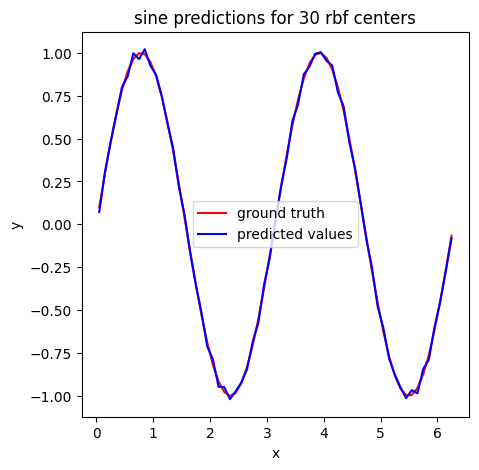

In [336]:
plot_data(x_test,y_test_sine,y_pred,hidden_units,"sine")

# f(x) = square(2x)

In [337]:
hidden_units = 40
rbf = RBF(hidden_units)
rbf.setVariance(0.1)

In [338]:
rbf.fit(x_train,y_train_square)

In [339]:
y_pred = rbf.predict(x_test)
#y_pred = np.sign(y_pred)
test_error = residual_error(y_pred,y_test_square)
y_train_pred = rbf.predict(x_train)
train_error = residual_error(y_train_pred,y_train_square)
print("residual train error for hidden units = {} is {}".format(hidden_units,train_error))
print("residual test error for hidden units = {} is {}".format(hidden_units,test_error))

residual train error for hidden units = 40 is 0.06843708624604854
residual test error for hidden units = 40 is 0.09320584589677289


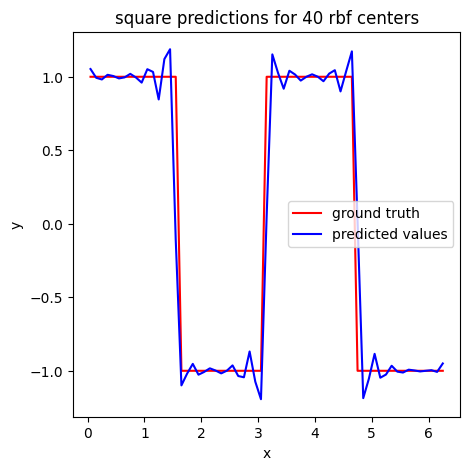

In [340]:
plot_data(x_test,y_test_square,y_pred,hidden_units,"square")

# On line learning 
# f(x) = sin(2x)

In [341]:
hidden_units = 40         #39
rbf = RBF(hidden_units)
rbf.setVariance(0.3)         #0.6

In [342]:
rbf.online_learning(x_train,y_train_sine,0.1,1)

In [343]:
y_pred_sin = rbf.predict(x_test)
test_error = residual_error(y_pred,y_test_sine)
y_pred_train = rbf.predict(x_train)
train_error = residual_error(y_pred_train,y_train_sine)
print("residual train error for hidden units = {} is {}".format(hidden_units,train_error))
print("residual test error for hidden units = {} is {}".format(hidden_units,test_error))

residual train error for hidden units = 40 is 0.06924491771609367
residual test error for hidden units = 40 is 0.33892977776971606


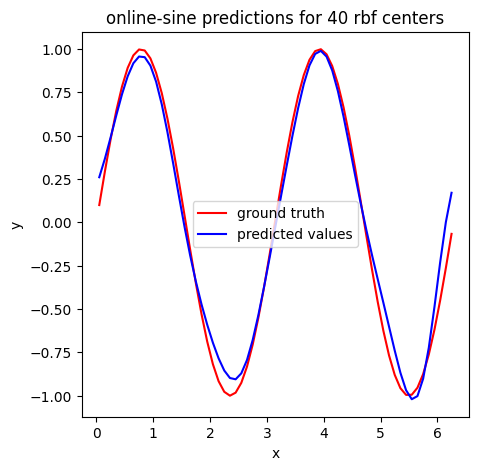

In [344]:
plot_data(x_test,y_test_sine,y_pred_sin,hidden_units,"online-sine")

# f(x) = square(x)

In [345]:
hidden_units = 62
rbf = RBF(hidden_units)
#rbf.setWeights(np.random.uniform(0,1,hidden_units))
rbf.setVariance(0.23)

In [346]:
rbf.online_learning(x_train,y_train_square,0.1,1)

In [347]:
y_pred = rbf.predict(x_test)
test_error = residual_error(y_pred,y_test_square)
y_pred_train = rbf.predict(x_train)
train_error = residual_error(y_pred_train,y_train_square)
print("residual train error for hidden units = {} is {}".format(hidden_units,train_error))
print("residual test error for hidden units = {} is {}".format(hidden_units,test_error))

residual train error for hidden units = 62 is 0.2671611240530932
residual test error for hidden units = 62 is 0.2745238402986868


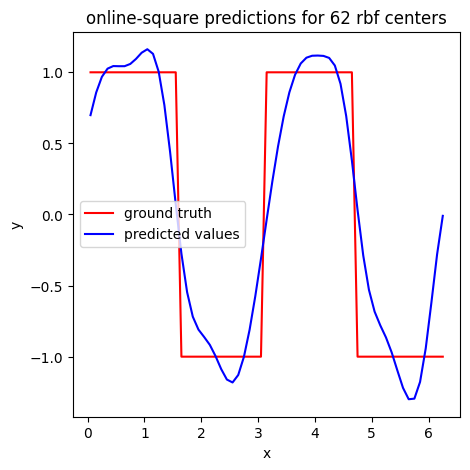

In [348]:
plot_data(x_test,y_test_square,y_pred,hidden_units,"online-square")

### 3.3

Compare CL and not CL

In [380]:
def competitive_learning(X, eta, max_iter, n_nodes):
    rbf_location = np.random.uniform(low = 0, high = 2*np.pi, size = (n_nodes, 1))

    for i in range(max_iter):
        for x in X:
            diff = np.abs(x - rbf_location)
            dist = np.square(diff)
            winner = np.argmin(dist)
            rbf_location[winner] += eta * (x - rbf_location[winner])
            eta = eta * 0.95 # decay learning rate 

    return rbf_location

def soft_competitive_learning(X, eta, max_iter, n_nodes, n_winners): # CL with more than one winner
    rbf_location = np.random.uniform(low = 0, high = 2*np.pi, size = (n_nodes, 1))

    for i in range(max_iter):
        for x in X:
            eta_neighbour = eta
            diff = np.abs(x - rbf_location)
            dist = diff@diff.T
            dist = np.sqrt(dist)
            #print(dist)
            diagonal = np.diag(dist)
            #print(diagonal)

            for j in range(n_winners):
                winner = np.argmin(diagonal)
                rbf_location[winner] += eta_neighbour * (x - rbf_location[winner])
                diagonal = np.delete(diagonal, winner)
                eta_neighbour = eta_neighbour * 0.5 # decay learning rate in the neighbourhood
            eta = eta * 0.95 # decay learning rate

    return rbf_location

In [390]:
n_hidden = 40
eta = 0.1
max_iterations = 10000
centers_CL_noiseless = competitive_learning(x_train, eta, max_iterations, n_hidden)

rbf_CL_noiseless = RBF(n_hidden)
rbf_CL_noiseless.setVariance(0.3)
rbf_CL_noiseless.setCenters(centers_CL_noiseless[:,0])
rbf_CL_noiseless.fit(x_train, y_train_sine)
y_pred_noiseless = rbf_CL_noiseless.predict(x_test)
y_train_pred_noiseless = rbf_CL_noiseless.predict(x_train)
test_error_noiseless = residual_error(y_pred_noiseless, y_test_sine)
train_error_noiseless = residual_error(y_pred_noiseless, y_train_sine)
print("Residual test error for noiseless CL is {}".format(test_error_noiseless))
print("Residual train error for noiseless CL is {}".format(train_error_noiseless))

noise = np.random.normal(scale = 0.1,size = x_train.shape[0])
y_train_sine_noise = y_train_sine + noise

rbf_CL_noiseless.fit(x_train, y_train_sine_noise)
y_pred_noisy = rbf_CL_noiseless.predict(x_test)
y_train_pred_noisy = rbf_CL_noiseless.predict(x_train)
test_error_noisy = residual_error(y_pred_noisy, y_test_sine)
train_error_noisy = residual_error(y_pred_noisy, y_train_sine)
print("Residual test error for noisy CL is {}".format(test_error_noisy))
print("Residual train error for noisy CL is {}".format(train_error_noisy))



Residual test error for noiseless CL is 1.429278142103312
Residual train error for noiseless CL is 1.4585849539691893
Residual test error for noisy CL is 1.3590497533742552
Residual train error for noisy CL is 1.3747200497709573


In [383]:
def plot_diff(x, y, y_pred, y_pred_CL, n_hidden, title):
    plt.figure(figsize=(12, 6))
    plt.plot(x, y, label='Ground Truth')
    plt.plot(x, y_pred, label='sin')
    plt.plot(x, y_pred_CL, label='CL-sin')
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

plot comparison CL and not CL for noiseless sine function

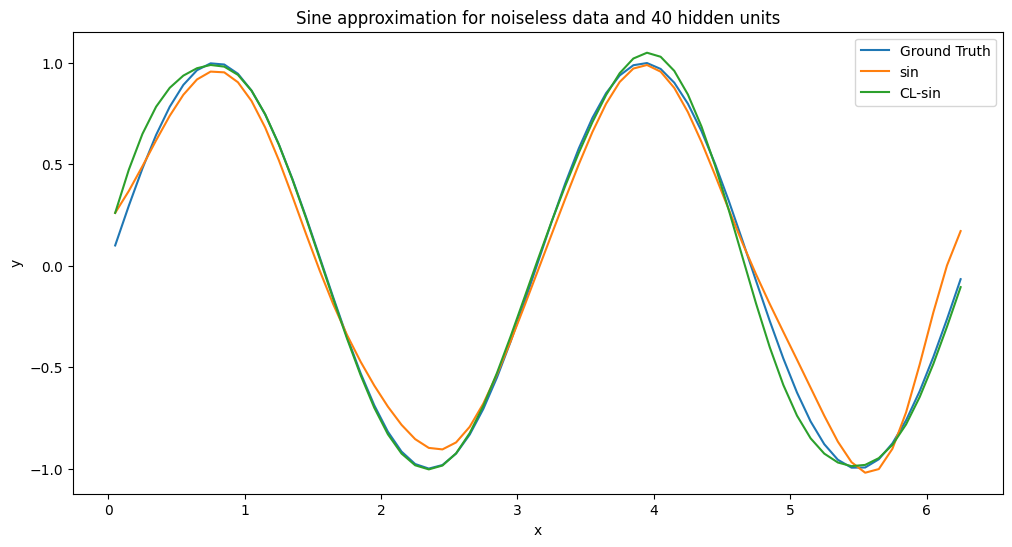

In [384]:
plot_diff(x_test, y_test_sine, y_pred_sin, y_pred_noiseless, n_hidden, "Sine approximation for noiseless data and 40 hidden units")

plot difference between CL and not CL for noisy sine function

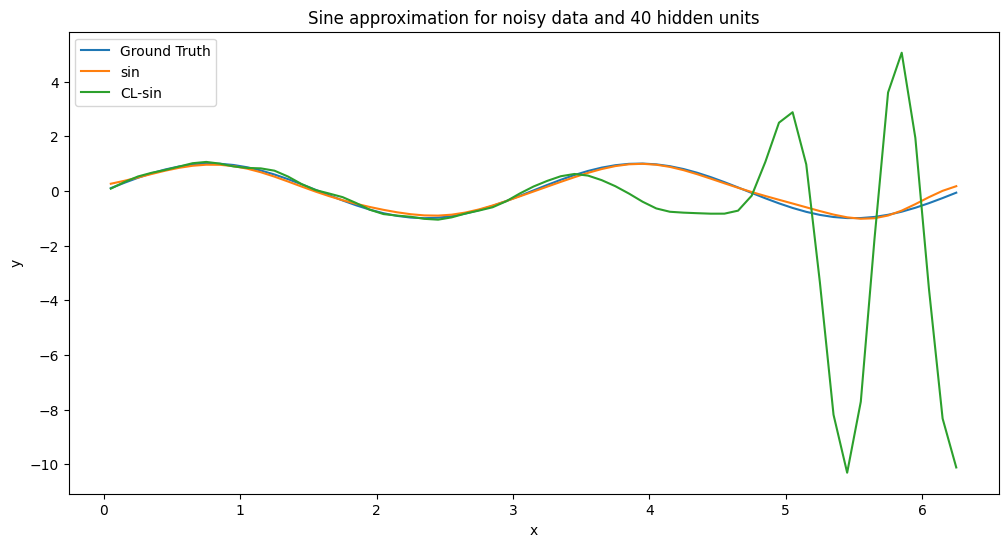

In [391]:
plot_diff(x_test, y_test_sine, y_pred_sin, y_pred_noisy, n_hidden, "Sine approximation for noisy data and 40 hidden units")

Compare CL with avoid dead units and vanilla CL

In [381]:
n_hidden = 40
eta = 0.1
max_iterations = 5000
n_winner = 5
centers_CL_noiseless = soft_competitive_learning(x_train, eta, max_iterations, n_hidden, n_winner)

rbf_CL_noiseless_pro = RBF(n_hidden)
rbf_CL_noiseless_pro.setVariance(0.3)
rbf_CL_noiseless_pro.setCenters(centers_CL_noiseless[:,0])
rbf_CL_noiseless_pro.fit(x_train, y_train_sine)
y_pred_noiseless_pro = rbf_CL_noiseless_pro.predict(x_test)
y_train_pred_noiseless = rbf_CL_noiseless_pro.predict(x_train)
test_error_noiseless_pro = residual_error(y_pred_noiseless_pro, y_test_sine)
train_error_noiseless_pro = residual_error(y_pred_noiseless_pro, y_train_sine)
print("Residual test error for noiseless CL is {}".format(test_error_noiseless_pro))
print("Residual train error for noiseless CL is {}".format(train_error_noiseless_pro))

Residual test error for noiseless CL is 0.24182145490294074
Residual train error for noiseless CL is 0.26958627514521105


plot comparison CL with avoid dead units and vanilla CL for noiseless sine function

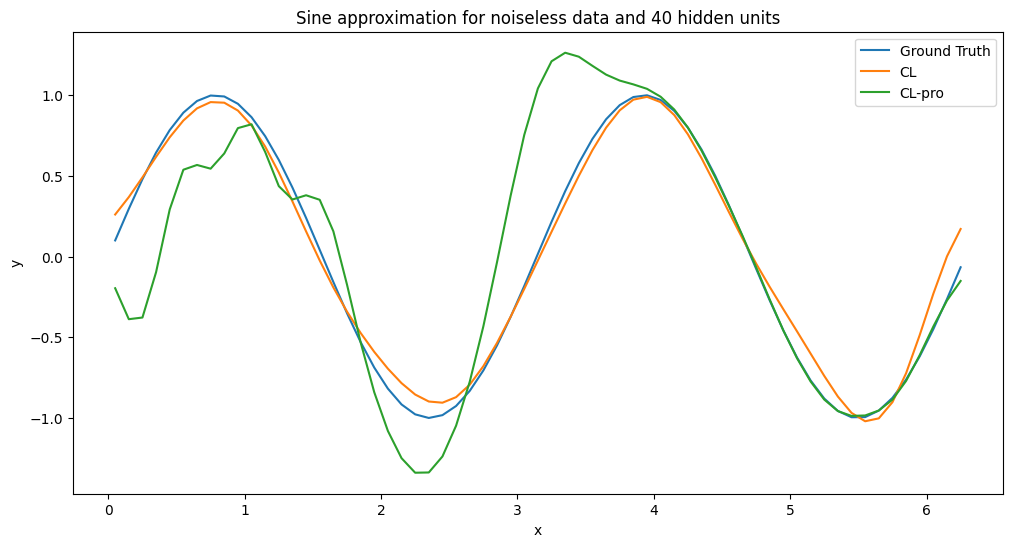

In [382]:
plot_diff(x_test, y_test_sine, y_pred_sin, y_pred_noiseless_pro, n_hidden, "Sine approximation for noiseless data and 40 hidden units")